#Import library

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import cv2

random.seed(108)

#Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Path

In [ ]:
!mkdir Road_Sign_Dataset
!cd Road_Sign_Dataset



In [ ]:
!mkdir Images

!mkdir Annotations

In [ ]:
import glob
def move(src, dst):
  for filename in glob.glob(os.path.join(src, '*.*')):
    shutil.copy(filename, dst)

move('/content/drive/MyDrive/Traffic_Light/Images-Labels_done','/content/Road_Sign_Dataset/Images')
move('/content/drive/MyDrive/Traffic_Light/labels', '/content/Road_Sign_Dataset/Annotations')

In [ ]:
# Read images and annotations
images = [os.path.join('Images', x) for x in os.listdir('Images')]
annotations = [os.path.join('Annotations', x) for x in os.listdir('Annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

print(images[190])

print(annotations[190])

Images/IMG-1150.jpg
Annotations/IMG-1150.txt


##Split filename to get num

In [ ]:
import re

def split_filename(path):
  img = []
  held_str = []
  for x in os.listdir(path):
    img.append(x)

  delimiters = "-", "."
  regex_pattern = '|'.join(map(re.escape, delimiters))
  for im in img:
    held_str.append(re.split(regex_pattern, im))

  return [held_str[i][1] for i in range(0,1154)]


##Train, validation, test split

In [ ]:
# Split the dataset into train-valid-test splits
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
print(len(train_images))
print(len(test_images))
print(len(val_images))
print(len(train_annotations))
print(len(test_annotations))
print(len(val_annotations))

923
116
115
923
116
115


In [ ]:
!mkdir Images/train Images/val Images/test Annotations/train Annotations/val Annotations/test

In [ ]:
#Utility function to move images
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
# Move the splits into their folders
move_files_to_folder(train_images, 'Images/train/')
move_files_to_folder(val_images, 'Images/val/')
move_files_to_folder(test_images, 'Images/test/')
move_files_to_folder(train_annotations, 'Annotations/train/')
move_files_to_folder(val_annotations, 'Annotations/val/')
move_files_to_folder(test_annotations, 'Annotations/test/')

In [ ]:
img = cv2.imread('/content/Road_Sign_Dataset/Images/train/IMG-004.jpg')
print(img.shape)

(720, 1280, 3)


In [ ]:
!pwd

/content/Road_Sign_Dataset


In [ ]:
mv Annotations labels

In [ ]:
mv Images images

In [ ]:
cd ..

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
cd yolov5

/content/yolov5


##Training


In [ ]:
!python train.py --img 720 --cfg yolov5s.yaml --hyp hyp.scratch-high.yaml --batch 32 --epochs 100 --data road_sign_data.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det

##Testing

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/Traffic_Light/Output/yolo_road_det3/weights/best.pt' --source /content/Road_Sign_Dataset/images/test --save-conf

In [ ]:
# Copying folders, format: !rsync -r --progress source_path destination_path
!rsync -r --progress "/content/yolov5/runs/train/yolo_road_det3" "/content/drive/MyDrive/Traffic_Light/Output"


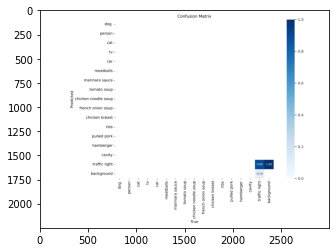

In [ ]:
detections_dir = "runs/train/yolo_road_det3/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))


##Test in video

In [ ]:
!python detect.py --weights runs/train/yolo_road_det3/weights/best.pt --source '/content/drive/MyDrive/Traffic Light/videos/Driving Downtown - Los Angeles 4K - USA (online-video-cutter.com).mp4'

##Copy result to google drive

In [ ]:
!rsync -r --progress "/content/yolov5/runs/detect/exp2/Driving Downtown - Los Angeles 4K - USA (online-video-cutter.com).mp4" "/content/drive/MyDrive/Traffic Light/Output"

sending incremental file list
Driving Downtown - Los Angeles 4K - USA (online-video-cutter.com).mp4
    245,476,888 100%  189.53MB/s    0:00:01 (xfr#1, to-chk=0/1)


##Test in images

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/Traffic_Light/Output/yolo_road_det3/weights/best.pt' --source /content/Road_Sign_Dataset/images/val

##Show random predicted images

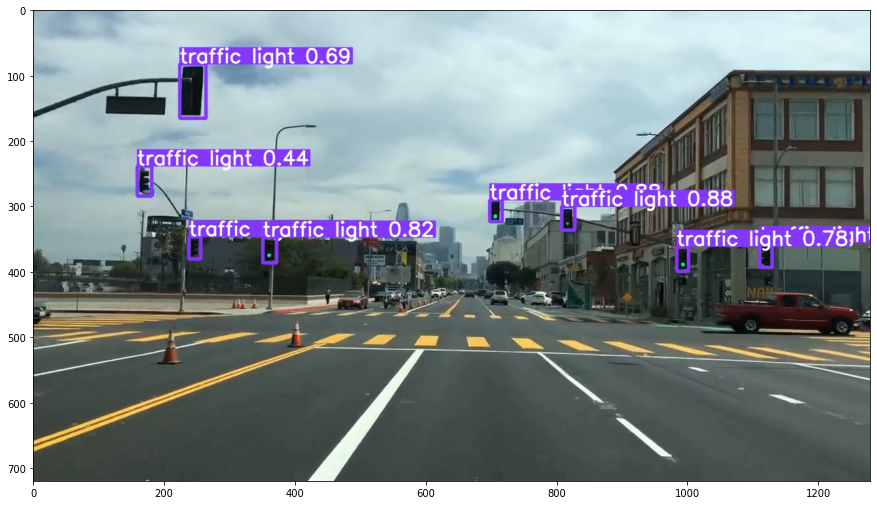

In [ ]:
detections_dir = "runs/detect/exp2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.rcParams['figure.figsize'] = (15, 12)
plt.imshow(np.array(random_detection_image))

##Copy result testing to google drive

In [ ]:
!rsync -r --progress "/content/yolov5/runs/detect/exp_2" "/content/drive/MyDrive/Traffic_Light/Output"

##Validation

In [ ]:
!python val.py --weight '/content/drive/MyDrive/Traffic_Light/Output/yolo_road_det3/weights/best.pt' --data road_sign_data.yaml

##Copy result validation to google drive

In [ ]:
!rsync -r --progress "/content/yolov5/runs/val/validation" "/content/drive/MyDrive/Traffic_Light/Output"